## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
x_train, y_train = train
x_test, y_test = test
x_train = x_train / 255.
x_test = x_test / 255.

# Flatten the images
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# Convert y to onehot
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [5]:
def build_mlp():
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])

    return model
model = build_mlp()

Instructions for updating:
Colocations handled automatically by placer.


In [6]:
model = build_mlp()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_6 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_7 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [7]:
optimizer = keras.optimizers.sgd(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 14s 284us/step - loss: 2.2533 - acc: 0.1637 - val_loss: 2.2000 - val_acc: 0.2169
Epoch 2/500
50000/50000 [==============================] - 13s 252us/step - loss: 2.1655 - acc: 0.2386 - val_loss: 2.1349 - val_acc: 0.2513
Epoch 3/500
50000/50000 [==============================] - 12s 245us/step - loss: 2.1092 - acc: 0.2604 - val_loss: 2.0865 - val_acc: 0.2767
Epoch 4/500
50000/50000 [==============================] - 12s 244us/step - loss: 2.0657 - acc: 0.2757 - val_loss: 2.0481 - val_acc: 0.2861
Epoch 5/500
50000/50000 [==============================] - 12s 245us/step - loss: 2.0306 - acc: 0.2865 - val_loss: 2.0161 - val_acc: 0.2949
Epoch 6/500
50000/50000 [==============================] - 12s 247us/step - loss: 2.0012 - acc: 0.2968 - val_loss: 1.9896 - val_acc: 0.3092
Epoch 7/500
50000/50000 [==============================] - 12s

50000/50000 [==============================] - 12s 246us/step - loss: 1.5222 - acc: 0.4711 - val_loss: 1.5455 - val_acc: 0.4625
Epoch 113/500
50000/50000 [==============================] - 12s 245us/step - loss: 1.5203 - acc: 0.4711 - val_loss: 1.5454 - val_acc: 0.4625
Epoch 114/500
50000/50000 [==============================] - 12s 248us/step - loss: 1.5184 - acc: 0.4720 - val_loss: 1.5449 - val_acc: 0.4652
Epoch 115/500
50000/50000 [==============================] - 12s 246us/step - loss: 1.5164 - acc: 0.4732 - val_loss: 1.5433 - val_acc: 0.4635
Epoch 116/500
50000/50000 [==============================] - 12s 245us/step - loss: 1.5146 - acc: 0.4737 - val_loss: 1.5409 - val_acc: 0.4618
Epoch 117/500
50000/50000 [==============================] - 12s 245us/step - loss: 1.5127 - acc: 0.4738 - val_loss: 1.5433 - val_acc: 0.4603
Epoch 118/500
50000/50000 [==============================] - 12s 245us/step - loss: 1.5112 - acc: 0.4740 - val_loss: 1.5368 - val_acc: 0.4679
Epoch 119/500
50000/

50000/50000 [==============================] - 12s 249us/step - loss: 1.3557 - acc: 0.5271 - val_loss: 1.4304 - val_acc: 0.4947
Epoch 223/500
50000/50000 [==============================] - 12s 244us/step - loss: 1.3549 - acc: 0.5281 - val_loss: 1.4399 - val_acc: 0.4952
Epoch 224/500
50000/50000 [==============================] - 12s 244us/step - loss: 1.3537 - acc: 0.5282 - val_loss: 1.4267 - val_acc: 0.4955
Epoch 225/500
50000/50000 [==============================] - 12s 243us/step - loss: 1.3519 - acc: 0.5284 - val_loss: 1.4274 - val_acc: 0.4969
Epoch 226/500
50000/50000 [==============================] - 12s 246us/step - loss: 1.3510 - acc: 0.5291 - val_loss: 1.4337 - val_acc: 0.4938
Epoch 227/500
50000/50000 [==============================] - 12s 243us/step - loss: 1.3496 - acc: 0.5304 - val_loss: 1.4276 - val_acc: 0.4978
Epoch 228/500
50000/50000 [==============================] - 12s 244us/step - loss: 1.3478 - acc: 0.5291 - val_loss: 1.4233 - val_acc: 0.4960
Epoch 229/500
50000/

50000/50000 [==============================] - 13s 255us/step - loss: 1.2254 - acc: 0.5726 - val_loss: 1.3843 - val_acc: 0.5042
Epoch 335/500
50000/50000 [==============================] - 13s 255us/step - loss: 1.2245 - acc: 0.5741 - val_loss: 1.3710 - val_acc: 0.5113
Epoch 336/500
50000/50000 [==============================] - 13s 254us/step - loss: 1.2226 - acc: 0.5742 - val_loss: 1.4032 - val_acc: 0.5056
Epoch 337/500
50000/50000 [==============================] - 13s 265us/step - loss: 1.2222 - acc: 0.5751 - val_loss: 1.3912 - val_acc: 0.5074TA: 0s - loss: 1.2220 - acc: 0. - ETA: 0s - loss: 1.2220 - acc: 0.575 - ETA: 0s - loss: 1.2226 - acc: 0.5
Epoch 338/500
50000/50000 [==============================] - 13s 261us/step - loss: 1.2212 - acc: 0.5750 - val_loss: 1.3772 - val_acc: 0.5092
Epoch 339/500
50000/50000 [==============================] - 13s 258us/step - loss: 1.2200 - acc: 0.5740 - val_loss: 1.3680 - val_acc: 0.5097
Epoch 340/500
50000/50000 [==============================

50000/50000 [==============================] - 8s 166us/step - loss: 1.1075 - acc: 0.6147 - val_loss: 1.3542 - val_acc: 0.5208
Epoch 448/500
50000/50000 [==============================] - 9s 171us/step - loss: 1.1058 - acc: 0.6135 - val_loss: 1.3612 - val_acc: 0.5175
Epoch 449/500
50000/50000 [==============================] - 9s 184us/step - loss: 1.1059 - acc: 0.6137 - val_loss: 1.3727 - val_acc: 0.5149
Epoch 450/500
50000/50000 [==============================] - 11s 219us/step - loss: 1.1036 - acc: 0.6171 - val_loss: 1.3711 - val_acc: 0.5141
Epoch 451/500
50000/50000 [==============================] - 10s 207us/step - loss: 1.1040 - acc: 0.6167 - val_loss: 1.3984 - val_acc: 0.5094
Epoch 452/500
50000/50000 [==============================] - 9s 177us/step - loss: 1.1019 - acc: 0.6171 - val_loss: 1.3518 - val_acc: 0.5235
Epoch 453/500
50000/50000 [==============================] - 9s 172us/step - loss: 1.1012 - acc: 0.6182 - val_loss: 1.3370 - val_acc: 0.5283
Epoch 454/500
50000/50000

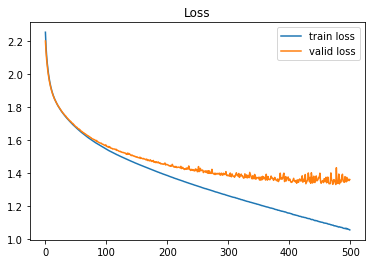

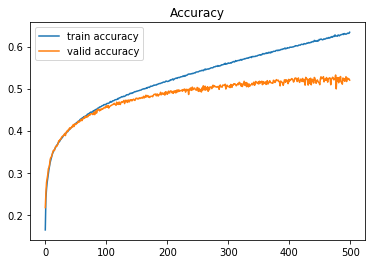

In [9]:
import matplotlib.pyplot as plt
"""
Get the training loss / validation loss / training accuracy / validation accuracy and plot them
"""

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()